## INTRODUCTION
The freestyle format of hackathons has time and again stimulated groundbreaking and innovative data insights and technologies. 
This project is based on the dataset uploaded at The Kaggle University Club Hackathon - UCI Machine Learning - Drug Review Dataset.

### Prompt

Machine learning has permeated nearly all fields and disciplines of study. One hot topic is using natural language processing and sentiment analysis to identify, extract, and make use of subjective information. The UCI ML Drug Review dataset provides patient reviews on specific drugs along with related conditions and a 10-star patient rating system reflecting overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. This data was published in a study on sentiment analysis of drug experience over multiple facets, ex. sentiments learned on specific aspects such as effectiveness and side effects (see the acknowledgments section to learn more).

### Find the datasets in the Github dir. or follow the link below
https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018?datasetId=76158&sortBy=voteCount

### About the datasets
The Drug Review Data Set is of shape (161297, 7) i.e. It has 7 features including the review and 161297 Data Points or entries.

The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful.

### About the project
With this dataset, I have tried to answer the following questions/conditions:
* What insights can we gain from exploring and visualizing our data?

* How does sentiment play into rating and usefulness of reviews?

* Can we create a way for people to find the best medication for their illness?

* What machine learning models work best for predicting the sentiment or rating based on review?

### This notebook contains the EDA for the project dataset.

In [1]:
# Import Libs.
import pandas as pd
import numpy as np
import text_normalizer as tn
import nltk

import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import unicodedata

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import Data
df_train = pd.read_csv("D:\DataSc\Datasets\drugsComTrain_raw.csv")
df_test = pd.read_csv("D:\DataSc\Datasets\drugsComTest_raw.csv")

In [4]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


### Get info on the datasets & compare them both

In [6]:
print('Train dataset shape:     ', df_train.shape)
print('Test dataset shape:      ', df_test.shape)
print('Train dataset features:  ', list(df_train))
print('Train dataset has same features as Test dataset: ', list(df_train) == list(df_test))
print('Train/Test ratio:        ', df_train.values.shape[0] / df_test.values.shape[0])

Train dataset shape:      (161297, 7)
Test dataset shape:       (53766, 7)
Train dataset features:   ['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
Train dataset has same features as Test dataset:  True
Train/Test ratio:         2.999981400885318


### Dataset features

* uniqueID (id): Id of the patient
* drugName (categorical): name of drug
* condition (categorical): name of condition
* review (text): patient review
* rating (numerical): 10 star patient rating
* date (date): date of review entry
* usefulCount (numerical): number of users who found review useful

Before we start EDA, Let's check out the unique values for each feature 

We compared the unique number of unique IDs and the length of the train data to see if the same customer has written multiple reviews, and there weren't more than one reviews for one customer.

In [7]:
print(len(df_train))
print(len(set(df_train['uniqueID'].values)))

161297
161297


### Let's check the unique conditions experienced by the patients and its count

In [8]:
df_train.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [9]:
df_train.condition.value_counts().head(10)

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

There are 884 unique conditions face by the patients, with Birth Control, Depression, and Pain being the most common.

### Let's check the unique drugs administered to the patients and their count.

In [10]:
df_train.drugName.value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

In [11]:
df_train.drugName.unique().shape

(3436,)

In [12]:
df_train.drugName.value_counts().head(10)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: drugName, dtype: int64

There are *3436* unique drugs administered to the patients. Levonorgestrel, Etonogestrel, and Ethinyl estradiol usage is the most common.

Since Birth Control is the most common condition faced by the patient, it makes sense that the top drugs in the dataset are:

* Levonorgestrel is a medicine used for emergency contraception. It provides safe and effective way to prevent an unintended pregnancy after an unprotected sex, contraceptive failure or irregular use of birth control pill. However, it will not prevent a pregnancy that has already happened.

* Etonogestrel is a medication which is used as a means of birth control for women. It is available as an implant placed under the skin of the upper arm under the brand names Nexplanon and Implanon, and in combination with ethinylestradiol, an estrogen, as a vaginal ring under the brand names NuvaRing and Circlet. Etonogestrel is effective as a means of birth control and lasts at least three or four years with some data showing effectiveness for five years. Following removal, fertility quickly returns.

* Ethinyl Estradiol is a type of female hormone (estrogen). This is a type of hormone replacement therapy (HRT) that is used to treat symptoms associated with menopause (hot flushes, vaginal dryness, and itching); estrogen deficiency; irregular periods; and thinning of bones (osteoporosis).

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


## Exploratory Data Analysis (EDA)

Let's start our EDA. Below we will viz. our dataset using graphs and make it simpler to understand and comprehend!

Let's start with what we know (or we found out):
* Plotting one figure with top & bottom 20 diseases/condition faced by the patients.
* Plotting 2nd figure with top & bottom 20 drugs used by the patients.

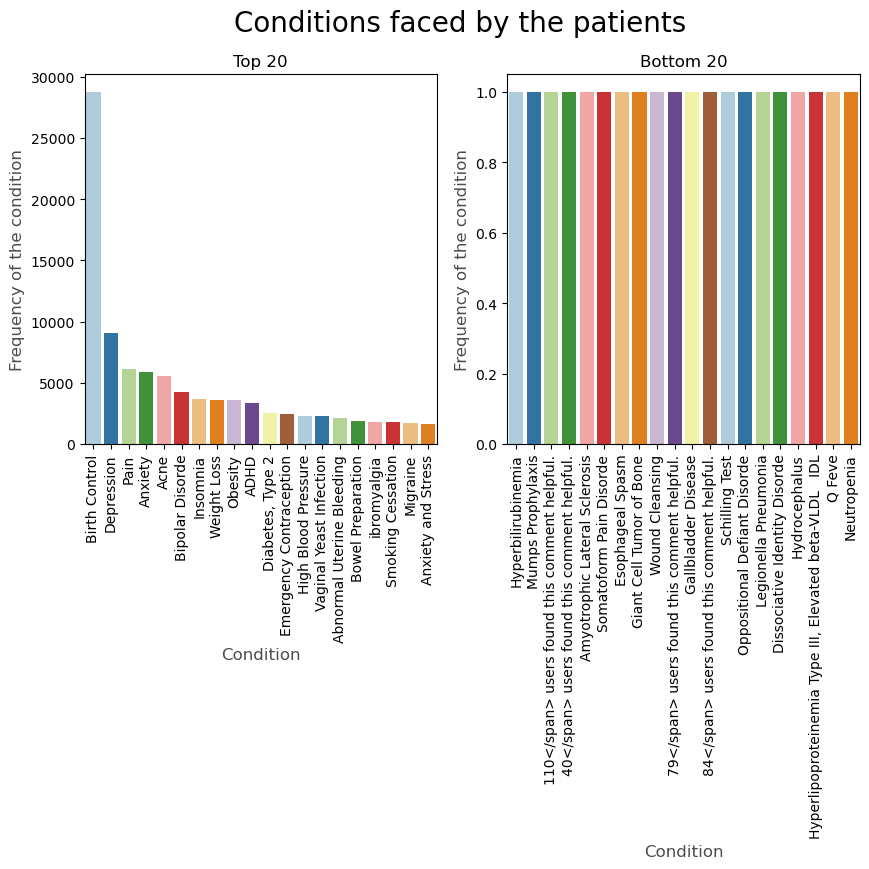

In [14]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Conditions faced by the patients', fontsize=20)
fig.subplots_adjust(top = 0.85)

ax1 = fig.add_subplot(1, 2, 1) # sub-graph-1
ax1.set_title("Top 20")
ax1 = sns.countplot(x = 'condition', data = df_train, order = df_train['condition'].value_counts().iloc[:20].index, palette="Paired")
ax1.set_xlabel('Condition', size = 12, alpha = 0.7)
ax1.set_ylabel('Frequency of the condition', size = 12, alpha = 0.7)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(1, 2, 2) # sub-graph-2
ax2.set_title("Bottom 20")
sns.countplot(x = 'condition', data = df_train, order = df_train['condition'].value_counts().iloc[-20:].index, palette="Paired")
ax2.set_xlabel('Condition', size = 12, alpha = 0.7)
ax2.set_ylabel('Frequency of the condition', size = 12, alpha = 0.7)
plt.xticks(rotation=90)
    
plt.show()
plt.tight_layout()
%matplotlib inline

From the above figure we can see that some of the conditions has "</span....." comment/condition. We will deal with them later
during Data pre-processing. For now, let's move ahead with our EDA

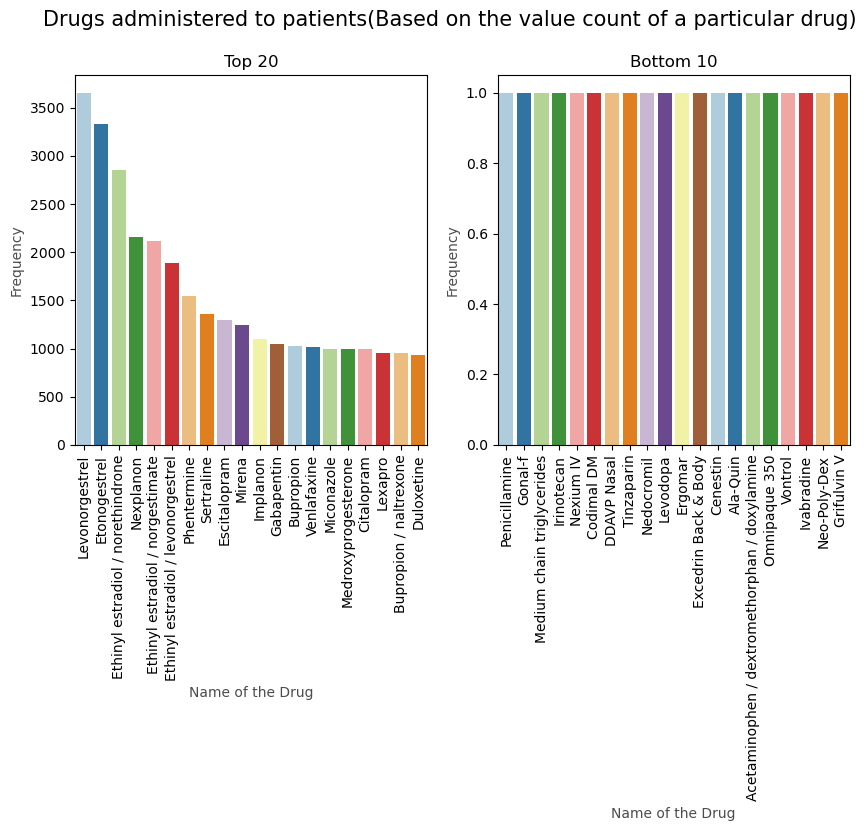

In [15]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Drugs administered to patients(Based on the value count of a particular drug)', fontsize=15)
fig.subplots_adjust(top = 0.85)

ax1 = fig.add_subplot(1, 2, 1) # sub-graph-1
ax1.set_title("Top 20")
ax1 = sns.countplot(x = 'drugName', data = df_train, order = df_train['drugName'].value_counts().iloc[:20].index, palette="Paired")
ax1.set_xlabel('Name of the Drug', size = 10, alpha = 0.7)
ax1.set_ylabel('Frequency', size = 10, alpha = 0.7)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(1, 2, 2) # sub-graph-2
ax2.set_title("Bottom 10")
sns.countplot(x = 'drugName', data = df_train, order = df_train['drugName'].value_counts().iloc[-20:].index, palette="Paired")
ax2.set_xlabel('Name of the Drug', size = 10, alpha = 0.7)
ax2.set_ylabel('Frequency', size = 10, alpha = 0.7)
plt.xticks(rotation=90)
    
plt.show()
plt.tight_layout()
%matplotlib inline

Now that we have visualized our previous finding, let's try to explore the dataset more!

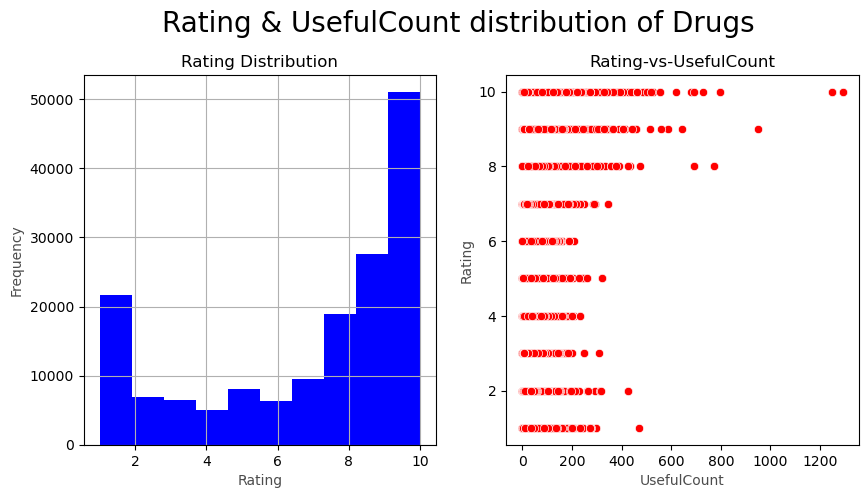

In [16]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Rating & UsefulCount distribution of Drugs', fontsize=20)
fig.subplots_adjust(top = 0.85)

ax1 = fig.add_subplot(1, 2, 1) # sub-graph-1
ax1.set_title("Rating Distribution")
ax1 = df_train.rating.hist(color = "b")
ax1.set_xlabel('Rating', size = 10, alpha = 0.7)
ax1.set_ylabel('Frequency', size = 10, alpha = 0.7)

ax2 = fig.add_subplot(1, 2, 2) # sub-graph-2
ax2.set_title("Rating-vs-UsefulCount")
sns.scatterplot(x = 'usefulCount', y = 'rating', data = df_train, ax = ax2, c="r")
ax2.set_xlabel('UsefulCount', size = 10, alpha = 0.7)
ax2.set_ylabel('Rating', size = 10, alpha = 0.7)

plt.show()
plt.tight_layout()
%matplotlib inline

This distribution illustrates that people generally write reviews for drugs either when the drug has a good affect on the condition of the patient or when the drug is not effective! 
From the above figure, we can see that:
* There are fewer ratings in the middle(2-7) as compared to ratings on the extreme ends(low or high).
* Same can be said for UsefulCount of a administered drug. People tend to look at others' opinion before they can validate the drug themselves i.e The reason for this is that the more drugs people look for, the more people read the review no matter their contents are good or bad, which makes the usefulcount very high. So when we create the model, we will normalize it by conditions, considering people's accessibility.

Now let's see the drugs with most and least average ratings

In [17]:
list_ratings = []

for drug in df_train.drugName.unique():
    if np.sum(df_train.drugName == drug) >= 10: # Avg. rating of drugs with more than or equal to 10 reviews
         list_ratings.append((drug, np.sum(df_train[df_train.drugName == drug].rating) / np.sum(df_train.drugName == drug)))

In [18]:
df_avg_rate = pd.DataFrame(list_ratings)
df_avg_rate = df_avg_rate.sort_values(by=[1], ascending=False).reset_index(drop=True) # Re-arrange the dataset based on rating(1)
df_avg_rate.shape

(1381, 2)

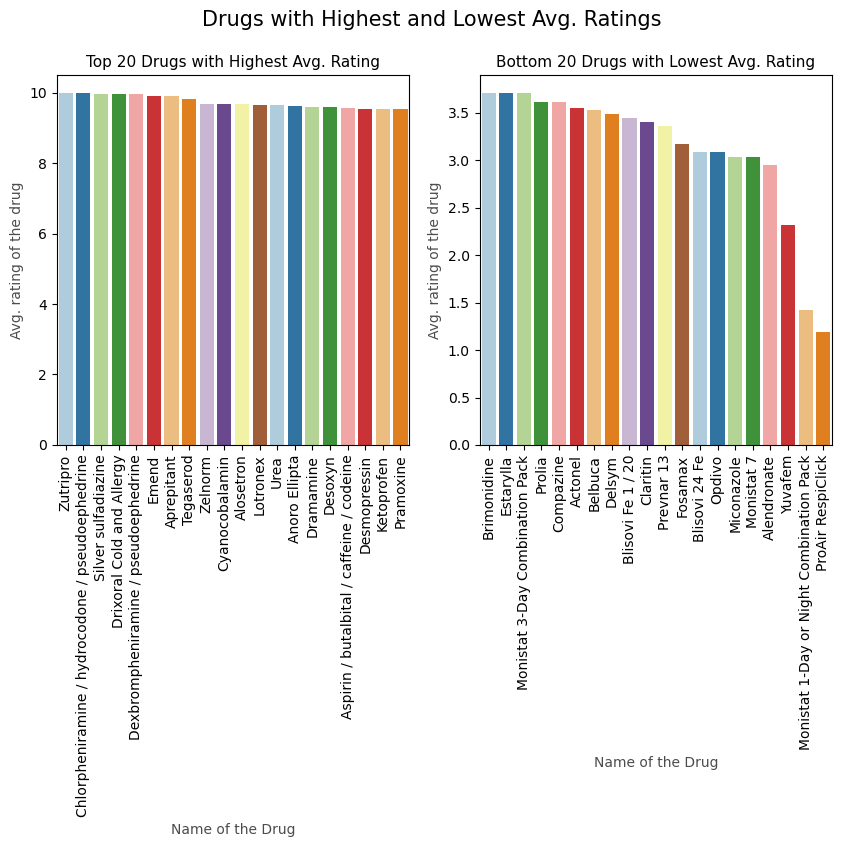

In [19]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Drugs with Highest and Lowest Avg. Ratings', fontsize=15)
fig.subplots_adjust(top = 0.85)

ax1 = fig.add_subplot(1, 2, 1) # sub-plot 1
ax1.set_title("Top 20 Drugs with Highest Avg. Rating", size = 11)
ax1 = sns.barplot(x = df_avg_rate[0].iloc[:20], y = df_avg_rate[1].iloc[:20], data = df_avg_rate, palette="Paired")
ax1.set_xlabel('Name of the Drug', size = 10, alpha = 0.7)
ax1.set_ylabel('Avg. rating of the drug', size = 10, alpha = 0.7)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(1, 2, 2) # sub-plot 2
ax2.set_title("Bottom 20 Drugs with Lowest Avg. Rating", size = 11)
ax2 = sns.barplot(x = df_avg_rate[0].iloc[-20:], y = df_avg_rate[1].iloc[-20:], data = df_avg_rate, palette="Paired")
ax2.set_xlabel('Name of the Drug', size = 10, alpha = 0.7)
ax2.set_ylabel('Avg. rating of the drug', size = 10, alpha = 0.7)
plt.xticks(rotation=90)
    
plt.show()
plt.tight_layout()
%matplotlib inline

From the above, we can see what drugs have a high and low avg. ratings as per patients. 

Now let's classify the most & least popular drugs based on a specific condition. This information could be helpful for users who are looking for medication for a specific condition.

In [20]:
cond_dic = {}

for condition in df_train.condition.unique():
    temp_list = []
    
    for drug in df_train[df_train.condition == condition].drugName.unique():
        if np.sum(df_train.drugName == drug) >= 10: # Avg. rating of drugs with more than or equal to 10 reviews
            temp_list.append((drug, np.sum(df_train[df_train.drugName == drug].rating) / np.sum(df_train.drugName == drug)))
        
    cond_dic[condition] = pd.DataFrame(data = temp_list, 
                                       columns = ['drugName', 'ratingAVG']).sort_values(by = 'ratingAVG', ascending = False).reset_index(drop = True)

Based on our findings above, Let's look at the drugs prescribed for the most common condition faced by the patients.
Let's plot the drugs with highest and lowest avgerage ratings for the following conditions:
* Birth Control
* Pain
* Depression

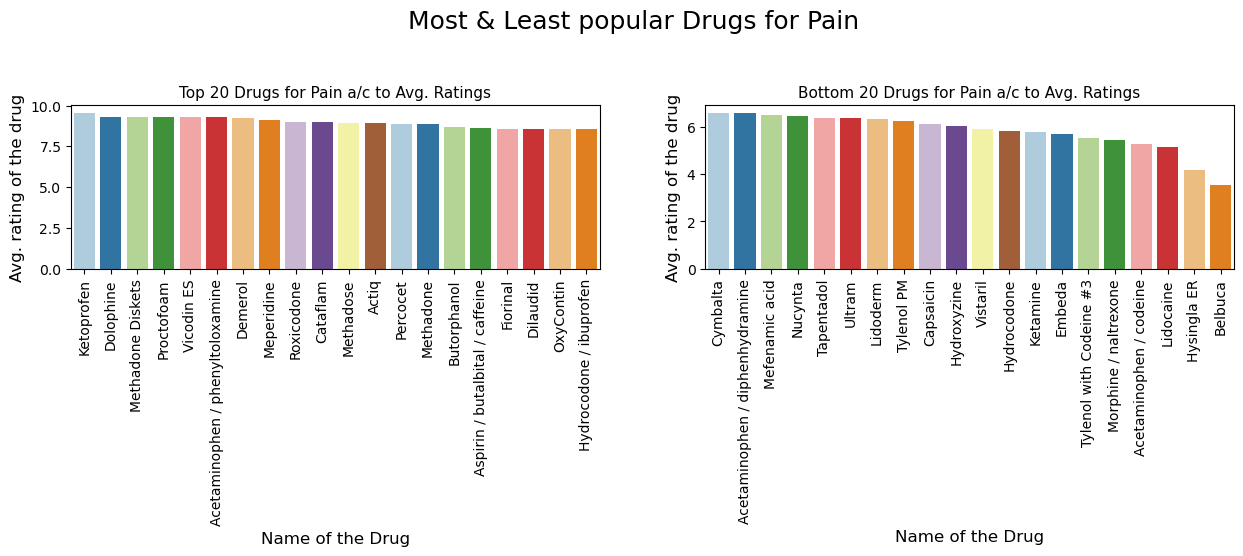

In [21]:
fig = plt.figure(figsize = (15, 12))
fig.suptitle('Most & Least popular Drugs for Pain', fontsize = 18)
fig.subplots_adjust(top = 0.9)

# Drugs with highest and lowest avgerage ratings for Pain condition

ax1 = fig.add_subplot(5, 2, 1) # sub-plot 1
ax1.set_title("Top 20 Drugs for Pain a/c to Avg. Ratings", size = 11)
ax1 = sns.barplot(x = cond_dic["Pain"].drugName.iloc[:20], 
            y = cond_dic["Pain"].ratingAVG.iloc[:20], 
            data = cond_dic["Pain"], 
            palette = "Paired")
ax1.set_xlabel('Name of the Drug', size = 12, alpha = 1)
ax1.set_ylabel('Avg. rating of the drug', size = 12, alpha = 1)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(5, 2, 2) # sub-plot 2
ax2.set_title("Bottom 20 Drugs for Pain a/c to Avg. Ratings", size = 11)
ax2 = sns.barplot(x = cond_dic["Pain"].drugName.iloc[-20:], 
            y = cond_dic["Pain"].ratingAVG.iloc[-20:], 
            data = cond_dic["Pain"], 
            palette = "Paired")
ax2.set_xlabel('Name of the Drug', size = 12, alpha = 1)
ax2.set_ylabel('Avg. rating of the drug', size = 12, alpha = 1)
plt.xticks(rotation=90)

    
plt.show()
plt.tight_layout()
%matplotlib inline

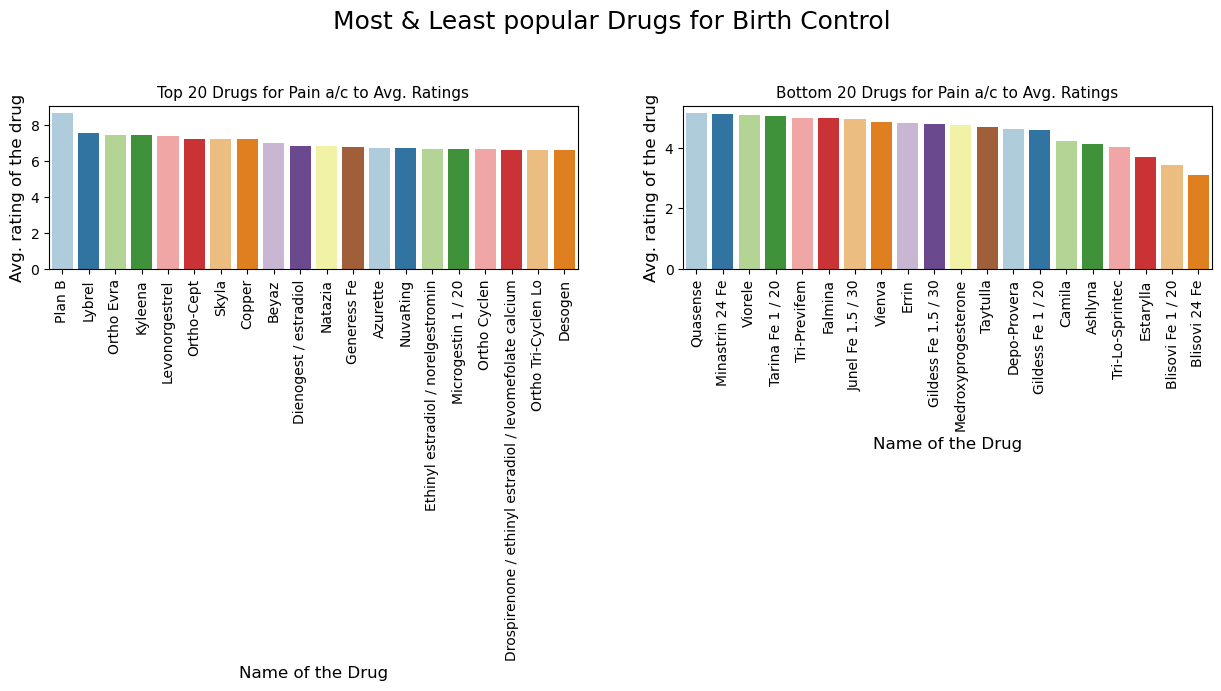

In [22]:
fig = plt.figure(figsize = (15, 12))
fig.suptitle('Most & Least popular Drugs for Birth Control', fontsize = 18)
fig.subplots_adjust(top = 0.9)

# Drugs with highest and lowest avgerage ratings for Pain condition

ax1 = fig.add_subplot(5, 2, 1) # sub-plot 1
ax1.set_title("Top 20 Drugs for Pain a/c to Avg. Ratings", size = 11)
ax1 = sns.barplot(x = cond_dic["Birth Control"].drugName.iloc[:20], 
            y = cond_dic["Birth Control"].ratingAVG.iloc[:20], 
            data = cond_dic["Birth Control"], 
            palette = "Paired")
ax1.set_xlabel('Name of the Drug', size = 12, alpha = 1)
ax1.set_ylabel('Avg. rating of the drug', size = 12, alpha = 1)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(5, 2, 2) # sub-plot 2
ax2.set_title("Bottom 20 Drugs for Pain a/c to Avg. Ratings", size = 11)
ax2 = sns.barplot(x = cond_dic["Birth Control"].drugName.iloc[-20:], 
            y = cond_dic["Birth Control"].ratingAVG.iloc[-20:], 
            data = cond_dic["Birth Control"], 
            palette = "Paired")
ax2.set_xlabel('Name of the Drug', size = 12, alpha = 1)
ax2.set_ylabel('Avg. rating of the drug', size = 12, alpha = 1)
plt.xticks(rotation=90)

    
plt.show()
plt.tight_layout()
%matplotlib inline

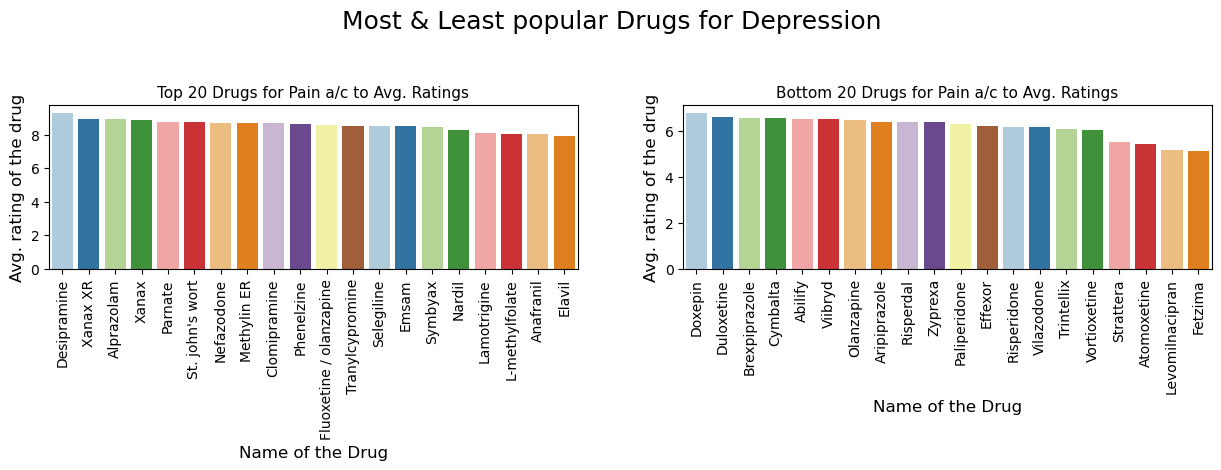

In [23]:
fig = plt.figure(figsize = (15, 12))
fig.suptitle('Most & Least popular Drugs for Depression', fontsize = 18)
fig.subplots_adjust(top = 0.9)

# Drugs with highest and lowest avgerage ratings for Pain condition

ax1 = fig.add_subplot(5, 2, 1) # sub-plot 1
ax1.set_title("Top 20 Drugs for Pain a/c to Avg. Ratings", size = 11)
ax1 = sns.barplot(x = cond_dic["Depression"].drugName.iloc[:20], 
            y = cond_dic["Depression"].ratingAVG.iloc[:20], 
            data = cond_dic["Depression"], 
            palette = "Paired")
ax1.set_xlabel('Name of the Drug', size = 12, alpha = 1)
ax1.set_ylabel('Avg. rating of the drug', size = 12, alpha = 1)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(5, 2, 2) # sub-plot 2
ax2.set_title("Bottom 20 Drugs for Pain a/c to Avg. Ratings", size = 11)
ax2 = sns.barplot(x = cond_dic["Depression"].drugName.iloc[-20:], 
            y = cond_dic["Depression"].ratingAVG.iloc[-20:], 
            data = cond_dic["Depression"], 
            palette = "Paired")
ax2.set_xlabel('Name of the Drug', size = 12, alpha = 1)
ax2.set_ylabel('Avg. rating of the drug', size = 12, alpha = 1)
plt.xticks(rotation=90)

    
plt.show()
plt.tight_layout()
%matplotlib inline

This information is really useful! We can easily find the best drugs for any given condition. We can also look out for drugs with low avg. ratings.
With this, we can prescribe the best drug for a specific condition.

### Here, we have checked drugs for the top 3 conditions faced by the patients. Simmilarly, we can check for other conditions too!

Let's keep exploring our dataset. Let's try to get some insights on the dataset based on the date column!

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


We can see that the date feature in the dataset is of object type. We need to convert it into datetime format!

In [25]:
# Converting date into datetime format
df_train['date'] = pd.to_datetime(df_train['date'], errors = 'coerce')

df_train['day'] = df_train['date'].dt.day         # Creating a day column
df_train['month'] = df_train['date'].dt.month     # Creating a month column
df_train['year'] = df_train['date'].dt.year       # Creating a year column

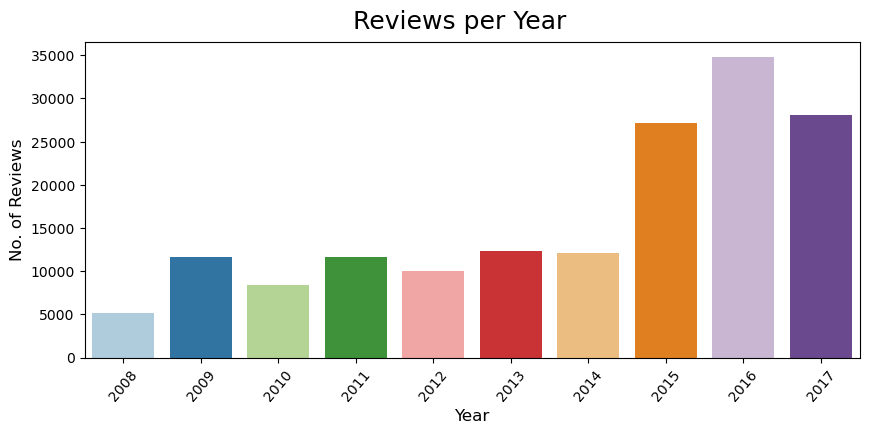

In [26]:
fig = plt.figure(figsize = (10, 4))
fig.suptitle('Reviews per Year', fontsize = 18)
fig.subplots_adjust(top = 0.9)

f = sns.countplot(x = "year", data = df_train, palette = "Paired")
f.set_xlabel('Year', size = 12, alpha = 1)
f.set_ylabel('No. of Reviews', size = 12, alpha = 1)
plt.xticks(rotation = 50)

plt.show()
plt.tight_layout()
%matplotlib inline

### End of the EDA 
